In [1]:
import pandas as pd

# Load the dataset, set index column to 0 
df = pd.read_csv('./data/data.csv', index_col=0) # Setting index_col=0 to remove index column since it does not provide any meaningful information.

# Display first 5 rows of your dataset
df.head()

,Risk_Category,Loan_Amount,Credit_Score,Loan_Purpose,Annual_Income,Employment_Length,Debt-to-Income_Ratio,Number_of_Open_Accounts,Number_of_Past_Due_Payments
0,high-risk,11353.0,617.0,business,54839.61,8.0,0.45,3.0,1.0
1,low-risk,21876.0,663.0,home improvement,59112.76,8.0,0.35,4.0,0.0
2,low-risk,27047.0,703.0,medical expenses,47681.40,8.0,0.30,5.0,1.0
3,low-risk,21286.0,704.0,debt consolidation,55967.60,8.0,0.35,3.0,1.0
4,low-risk,17550.0,737.0,car,56127.67,8.0,0.35,3.0,0.0


In [2]:
# Understanding your dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10100 entries, 0 to 10099
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Risk_Category                10099 non-null  object 
 1   Loan_Amount                  10099 non-null  float64
 2   Credit_Score                 10099 non-null  float64
 3   Loan_Purpose                 10098 non-null  object 
 4   Annual_Income                10099 non-null  float64
 5   Employment_Length            10100 non-null  float64
 6   Debt-to-Income_Ratio         10097 non-null  float64
 7   Number_of_Open_Accounts      10100 non-null  float64
 8   Number_of_Past_Due_Payments  10099 non-null  float64
dtypes: float64(7), object(2)
memory usage: 789.1+ KB


Detecting Missing Values: Checking for null Values

Missing values can wreak havoc on your analyses if not handled properly. By checking for null values, you can identify which columns have missing data and decide how to handle them. The Risk_Category, Loan_Amount, Credit_Score, Loan_Purpose, Annual_Income, Debt-to-Income_Ratio and Number_of_Past_Due_Payments features have 1, 1, 1, 2, 1, 3 and 1 missing values respectively, indicating the presence of missing data.

In [3]:
# To understand the central tendency, spread, and overall shape of the data's distribution, df.describe() is a useful tool.
## .T flip its rows and columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_Amount,10099.0,18498.277948,7616.261763,-474487.00,16057.50,18842.00,21276.500,134589.00
Credit_Score,10099.0,666.094762,228.169131,-13752.00,642.00,685.00,712.000,2586.00
Annual_Income,10099.0,54979.502629,122210.700894,-9001413.59,51582.75,54960.52,58356.525,6597344.37
Employment_Length,10100.0,5.557030,3.102088,-39.00,3.00,5.00,8.000,69.00
Debt-to-Income_Ratio,10097.0,0.392755,0.315843,-1.70,0.35,0.40,0.450,18.50
Number_of_Open_Accounts,10100.0,3.385644,1.468989,-77.00,3.00,3.00,4.000,58.00
Number_of_Past_Due_Payments,10099.0,0.788296,0.852070,-24.00,0.00,1.00,1.000,43.00


When columns like 'Loan_Amount', 'Credit_Score', 'Annual_Income', 'Employment_Length', 'Debt-to-Income_ratio', 'Number_of_Open_Accounts', and 'Number_of_Past_Due_Payments' contain negative values, it typically indicates an issue with the data. All of these columns should never be negative.

1. Data Entry or Measurement Errors are often a result of data entry mistakes or faulty measurement during data collection.
2. Logical Errors in Preprocessing, if these values were processed or transformed incorrectly (e.g., improper scaling or normalization), this could lead to negative values appearing where they don't logically belong.

Before applying absolute values to these columns containing of negative values, filter out all these values and find out are there any complication when turning them to positive values.

In [4]:
# Function to filter negative values
def find_neg_values(column_name):
    return df[df[column_name] < 0]

# List of columns to check for negative values
columns_to_check = [
    'Credit_Score',
    'Loan_Amount',
    'Annual_Income',
    'Employment_Length',
    'Debt-to-Income_Ratio',
    'Number_of_Open_Accounts',
    'Number_of_Past_Due_Payments'
]

# Dictionary to store negative values for each column
neg_values_dict = {}

# Iterate through the columns and find negative values
for col in columns_to_check:
    neg_values = find_neg_values(col)
    if not neg_values.empty:  # Only store non-empty results
        neg_values_dict[col] = neg_values

# Display the negative values in a readable format
if neg_values_dict:
    for col, neg_values in neg_values_dict.items():
        print(f"--- Negative Values for {col} ---")
        print(neg_values.to_string(index=False))  # Print without index
        print("\n")  # Add a newline for better separation
else:
    print("No negative values found.")

--- Negative Values for Credit_Score ---
Risk_Category  Loan_Amount  Credit_Score       Loan_Purpose  Annual_Income  Employment_Length  Debt-to-Income_Ratio  Number_of_Open_Accounts  Number_of_Past_Due_Payments
    high-risk      16154.0      -11083.0 debt consolidation       52387.98               10.0                  0.50                      5.0                          1.0
     low-risk      20732.0       -5666.0                car       54195.24               10.0                  0.35                      2.0                          0.0
    high-risk      14867.0      -13752.0 debt consolidation       57801.67                2.0                   NaN                      4.0                          2.0
    high-risk      16295.0       -3118.0           business       58344.34                3.0                  0.50                      5.0                          1.0
     low-risk      20166.0        -682.0           business       51929.69                8.0                

In Singapore, credit scores generally range from 300 (poor) to 900 (excellent), with a possible maximum of 1,000. Any credit score exceeding 1,000 is considered erroneous, as it falls outside the standard scoring framework used by credit bureaus like Credit Bureau Singapore (CBS).

Following an inspection of the 'Loan_Amount,' 'Credit_Score,' 'Annual_Income,' 'Employment_Length,' 'Debt-to-Income_Ratio,' 'Number_of_Open_Accounts,' and 'Number_of_Past_Due_Payments' columns, the only significant issue was found in the 'Credit_Score' column. Specifically, the values exceed 1,000 is considered erroneous.

Let's find out in credit score column any value exceed 1,000

In [5]:
# Filter the data for outliers
outliers = df[(df['Credit_Score'] > 1000)]

# Display the outliers
outliers

,Risk_Category,Loan_Amount,Credit_Score,Loan_Purpose,Annual_Income,Employment_Length,Debt-to-Income_Ratio,Number_of_Open_Accounts,Number_of_Past_Due_Payments
5154,low-risk,23075.0,2586.0,car,56535.78,8.0,0.4,5.0,0.0


Following an inspection of the 'Credit_Score' column row values exceeding 1,000(positive and negative) other columns values look normal, for now replace them with NaN.

In [6]:
import numpy as np

# Replace values in 'Credit_Score' exceeding 1000 or less than -1000 with NaN
df.loc[(df['Credit_Score'] > 1000) | (df['Credit_Score'] < -1000), 'Credit_Score'] = np.nan

print(df[df['Credit_Score'] > 1000])

Empty DataFrame
Columns: [Risk_Category, Loan_Amount, Credit_Score, Loan_Purpose, Annual_Income, Employment_Length, Debt-to-Income_Ratio, Number_of_Open_Accounts, Number_of_Past_Due_Payments]
Index: []


Proceed to apply absolute to these 7 columns.

In [7]:
# Create a list of these column names
columns_to_absolute = [
    'Loan_Amount', 
    'Credit_Score', 
    'Annual_Income', 
    'Employment_Length', 
    'Debt-to-Income_Ratio', 
    'Number_of_Open_Accounts', 
    'Number_of_Past_Due_Payments'
]

# Applying absolute values to the specified columns
df[columns_to_absolute] = df[columns_to_absolute].abs()

# Display the updated DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_Amount,10099.0,18727.147539,7034.687742,3431.00,16062.000,18848.00,21282.50,474487.00
Credit_Score,10093.0,670.761914,58.451167,393.00,642.000,685.00,712.00,812.00
Annual_Income,10099.0,57467.828529,121060.406812,36450.05,51587.075,54971.29,58365.19,9001413.59
Employment_Length,10100.0,5.569505,3.079631,2.00,3.000,5.00,8.00,69.00
Debt-to-Income_Ratio,10097.0,0.393221,0.315263,0.30,0.350,0.40,0.45,18.50
Number_of_Open_Accounts,10100.0,3.407426,1.417726,2.00,3.000,3.00,4.00,77.00
Number_of_Past_Due_Payments,10099.0,0.794831,0.845976,0.00,0.000,1.00,1.00,43.00


## Summary Observations:
- There are a few extreme outliers in the dataset, notably in the **Loan_Amount**, **Annual_Income**, **Employment_Length**, **Debt-to-Income_Ratio**, **Number_of_Open_Accounts** and **Number_of_Past_Due_Payments** columns. These may need further investigation.
- The distributions for 'Credit_Score' column seem reasonable.

In [8]:
# Identify duplicates
df.duplicated().sum()

98

In [9]:
# Identify and Sort Duplicates
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,Risk_Category,Loan_Amount,Credit_Score,Loan_Purpose,Annual_Income,Employment_Length,Debt-to-Income_Ratio,Number_of_Open_Accounts,Number_of_Past_Due_Payments
0,high-risk,11353.0,617.0,business,54839.61,8.0,0.45,3.0,1.0
9455,high-risk,11353.0,617.0,business,54839.61,8.0,0.45,3.0,1.0
29,high-risk,11983.0,571.0,home improvement,56092.81,3.0,0.50,2.0,1.0
2173,high-risk,11983.0,571.0,home improvement,56092.81,3.0,0.50,2.0,1.0
37,high-risk,12342.0,624.0,debt consolidation,54222.63,3.0,0.45,3.0,2.0
...,...,...,...,...,...,...,...,...,...
7512,low-risk,24371.0,713.0,home improvement,52448.52,3.0,0.40,2.0,0.0
2,low-risk,27047.0,703.0,medical expenses,47681.40,8.0,0.30,5.0,1.0
2580,low-risk,27047.0,703.0,medical expenses,47681.40,8.0,0.30,5.0,1.0
61,low-risk,33437.0,721.0,car,53981.90,2.0,0.40,5.0,0.0


In [10]:
# Inspecting and confirming that these rows are actual duplicates, we need to remove them from the data to prevent misleading 
## information during our analysis.
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10002 entries, 0 to 10099
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Risk_Category                10001 non-null  object 
 1   Loan_Amount                  10001 non-null  float64
 2   Credit_Score                 9995 non-null   float64
 3   Loan_Purpose                 10000 non-null  object 
 4   Annual_Income                10001 non-null  float64
 5   Employment_Length            10002 non-null  float64
 6   Debt-to-Income_Ratio         9999 non-null   float64
 7   Number_of_Open_Accounts      10002 non-null  float64
 8   Number_of_Past_Due_Payments  10001 non-null  float64
dtypes: float64(7), object(2)
memory usage: 781.4+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_Amount,10001.0,18722.878612,7059.707568,3431.00,16058.00,18844.00,21275.00,474487.00
Credit_Score,9995.0,670.629415,58.492823,393.00,642.00,685.00,712.00,812.00
Annual_Income,10001.0,57498.034637,121650.724024,36450.05,51590.33,54971.31,58370.11,9001413.59
Employment_Length,10002.0,5.571786,3.082166,2.00,3.00,5.00,8.00,69.00
Debt-to-Income_Ratio,9999.0,0.393364,0.316739,0.30,0.35,0.40,0.45,18.50
Number_of_Open_Accounts,10002.0,3.407119,1.420852,2.00,3.00,3.00,4.00,77.00
Number_of_Past_Due_Payments,10001.0,0.796120,0.847661,0.00,0.00,1.00,1.00,43.00


To choose the appropriate estimator for each column missing values, we need to consider the distribution of the data and whether the mean or median would better represent the central tendency, especially in the presence of outliers.

### General Rule:
- **Mean** is more sensitive to extreme outliers.
- **Median** is more robust and resistant to outliers, providing a better measure for skewed distributions.

### Loan_Amount:
- **Mean**: $18,722.88, but the maximum value is $474,487, which is significantly higher than the 75th percentile ($21,275).
- **Recommendation**: The median ($18,844) is more appropriate due to the presence of extreme outliers (as indicated by the large max value).

### Credit_Score:
- **Mean**: 670.63, but the data appears to be less skewed (the 25%, 50%, and 75% percentiles are close together).
- **Recommendation**: The mean is appropriate since the data distribution seems fairly normal with no extreme outliers.

### Annual_Income:
- **Mean**: $57,498, but the max value of $9,001,413.59 suggests the presence of extreme outliers. The 75th percentile is $58,370.11, and the mean is significantly higher.
- **Recommendation**: Use the median ($54,971.31) due to the highly skewed distribution caused by extreme outliers.

### Employment_Length:
- **Mean**: 5.57 years, but the maximum value of 69 years is extremely high compared to the 75th percentile (8 years).
- **Recommendation**: Use the median (5 years) as it is more robust against extreme outliers.

### Debt-to-Income Ratio:
- **Mean**: 0.3934, but the max value of 18.50 indicates the presence of significant outliers. Most of the data is concentrated around 0.35 to 0.45 (25th to 75th percentiles).
- **Recommendation**: Use the median (0.40) to avoid the influence of outliers.

### Number of Open Accounts:
- **Mean**: 3.41 accounts, and the distribution seems quite normal between the 25th (3) and 75th percentiles (4). However, there are extreme outliers with a max of 77 accounts.
- **Recommendation**: Use the median (3) since the data has potential outliers (the max value is high).

### Number of Past Due Payments:
- **Mean**: 0.796, but the max value is 43, while the 50th percentile is just 1.
- **Recommendation**: Use the median (1) due to the presence of extreme outliers.


In [12]:
# Fill up missing values in Categorical Columns
df.fillna({
            'Risk_Category': df['Risk_Category'].mode()[0],
            'Loan_Purpose': df['Loan_Purpose'].mode()[0],
            'Loan_Amount': df['Loan_Amount'].median(),
            'Credit_Score': df['Credit_Score'].median(),
            'Annual_Income': df['Annual_Income'].median(),
            'Debt-to-Income_Ratio': df['Debt-to-Income_Ratio'].median(),
            'Number_of_Past_Due_Payments': df['Number_of_Past_Due_Payments'].median()
        }, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10002 entries, 0 to 10099
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Risk_Category                10002 non-null  object 
 1   Loan_Amount                  10002 non-null  float64
 2   Credit_Score                 10002 non-null  float64
 3   Loan_Purpose                 10002 non-null  object 
 4   Annual_Income                10002 non-null  float64
 5   Employment_Length            10002 non-null  float64
 6   Debt-to-Income_Ratio         10002 non-null  float64
 7   Number_of_Open_Accounts      10002 non-null  float64
 8   Number_of_Past_Due_Payments  10002 non-null  float64
dtypes: float64(7), object(2)
memory usage: 781.4+ KB


## To visualize the count of different loan types in our dataset using the 'loan purpose' feature.

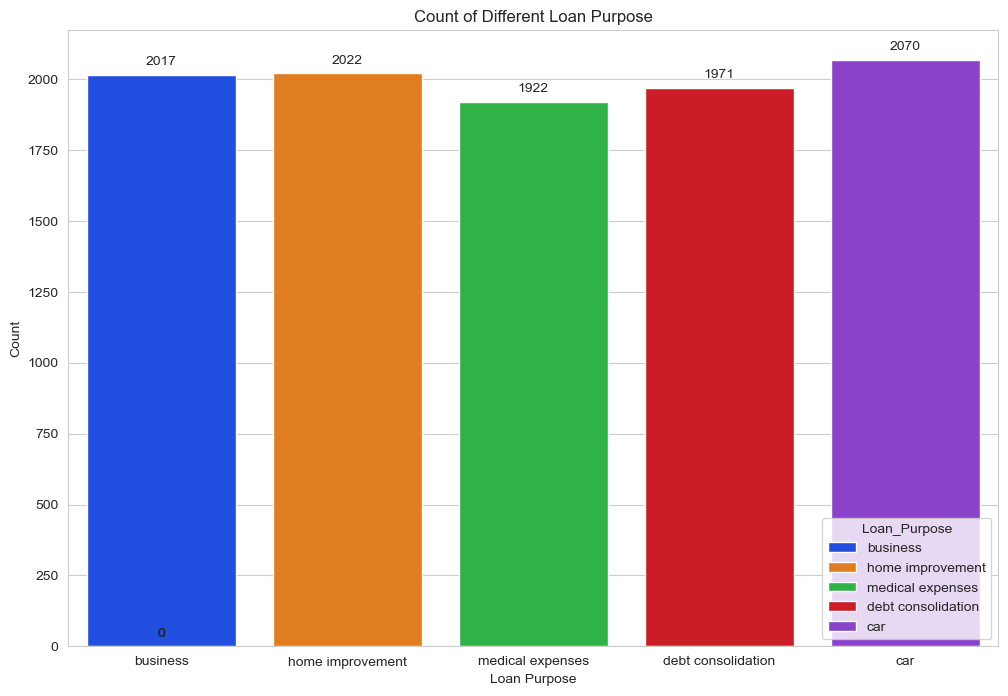

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Bar chart for flat type with annotations
plt.figure(figsize=(12, 8))
count_plot = sns.countplot(x='Loan_Purpose', hue='Loan_Purpose', data=df, palette='bright', legend=True)
plt.title('Count of Different Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')

# Annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 9),
                        textcoords = 'offset points')

plt.show()

These indicates 5 different loan types in the dataset namely `'business'`, `'home improvement'`, `'medical expenses'`, `'debt consolidation'` and `'car'`. It shows that the count of data for 5 different loan types are balance.

Let's check the distribution of the target variable (Risk_Category). A count plot will show the number of high-risk and low-risk applicants. This can help you understand whether your dataset is balanced or imbalanced. An imbalanced dataset may require special handling during model training (e.g., oversampling, undersampling).

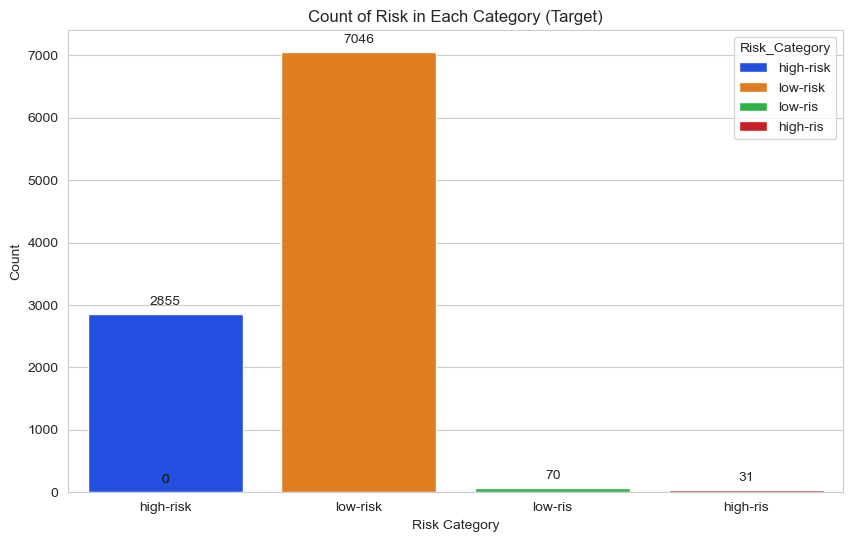

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Bar chart for price category with annotations
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='Risk_Category',hue='Risk_Category', data=df, palette='bright', legend=True)
plt.title('Count of Risk in Each Category (Target)')
plt.xlabel('Risk Category')
plt.ylabel('Count')

# Annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points')

plt.show()

## Interpreting the Bar Chart
In the bar chart we plotted above, we can make several key observations about the 'risk category' feature.
- 1. Trends

The most common risk types in the dataset are 'low-risk' category. If there is a large imbalance (e.g., significantly more low-risk applicants than high-risk), it could influence model performance.

- 2. Data Inaccuracies

We notice that there are 'high-risk', 'high-ris' and 'low-risk', 'low-ris' categories in the dataset. Assuming that these categories refer to the same type of risk category and that the discrepancy are due to a labeling error, it is important to clean the data. This step ensures consistency and accuracy in our analysis, as inconsistencies like these can skew results and interpretations.

Risk_Category
low-risk     7116
high-risk    2886
Name: count, dtype: int64


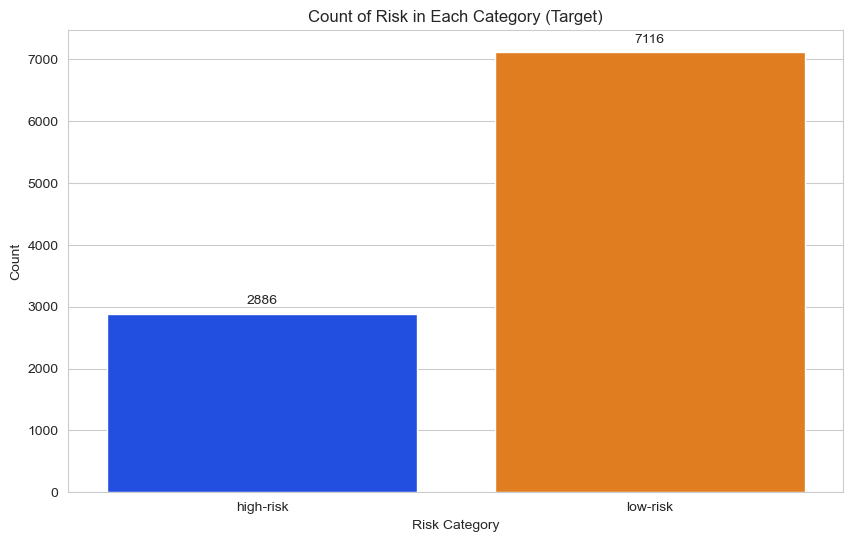

In [15]:
# Replace 'low-ris' and 'high-ris' with 'low-risk' and 'high-risk' respectively in the 'Risk_Category' column
df['Risk_Category'] = df['Risk_Category'].replace({'low-ris': 'low-risk', 'high-ris': 'high-risk'})

# Verify the changes
print(df['Risk_Category'].value_counts())

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Bar chart for price category with annotations
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='Risk_Category',hue='Risk_Category', data=df, palette='bright', legend=False)
plt.title('Count of Risk in Each Category (Target)')
plt.xlabel('Risk Category')
plt.ylabel('Count')

# Annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points')

plt.show()

Data imbalance occurs when the distribution of classes in the target variable is significantly skewed, as in the case of your Risk_Category data, where low-risk accounts for 7,115 instances and high-risk for 2,886. This imbalance can have a notable impact on training machine learning models, particularly classification models.

## Distribution of Credit_Score

Plot a histogram to understand how credit scores are distributed in general and whether there are any noticeable differences between high-risk and low-risk applicants.

Credit score is one of the most crucial indicators for loan eligibility. A histogram will show the distribution of credit scores across all applicants, while adding a hue based on Risk_Category will allow you to see how credit scores differ for high-risk and low-risk categories. A KDE plot smooths the histogram to give a better idea of the distribution's density.

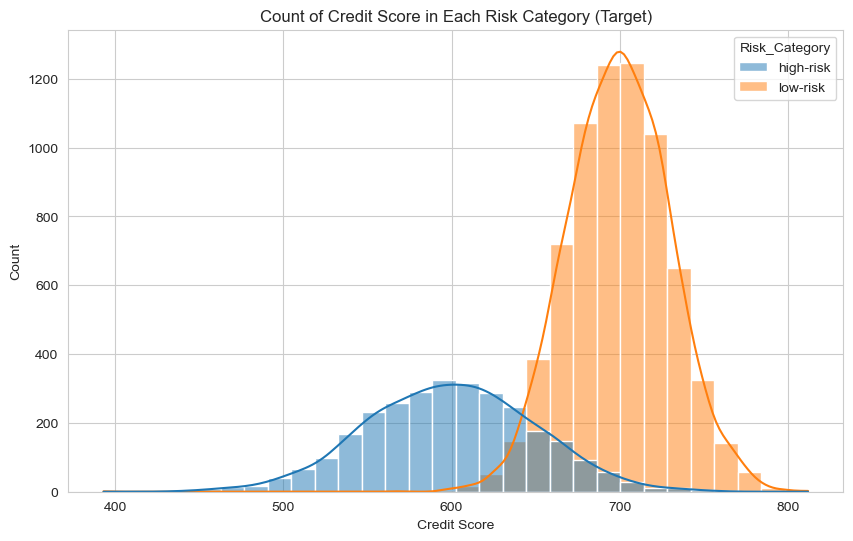

In [16]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram with KDE overlay
ax = sns.histplot(data=df, x='Credit_Score', hue='Risk_Category', kde=True, stat="count", bins=30)

# Set the title and labels
plt.title('Count of Credit Score in Each Risk Category (Target)')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

# Axes and Labels:
- The x-axis represents the **Credit Score**, ranging approximately from **400 to 800**.
- The y-axis represents the **Count of occurrences**, indicating how many observations fall into each bin.
- The title of the plot is **"Count of Credit Score in Each Risk Category (Target)"**, indicating that the plot shows how credit scores are distributed across different risk categories.

# Color Coding:
- There are two categories in the **Risk_Category** column:
  - **High-risk**: Visualized in **blue**.
  - **Low-risk**: Visualized in **orange**.
- The **KDE lines** (smooth curves) represent the probability density for each risk category.

# Distribution:
- **High-risk (blue)**: The distribution is more spread out and skewed towards lower credit scores (around **500–650**). This suggests that individuals with lower credit scores are more likely to be categorized as high-risk.
- **Low-risk (orange)**: The distribution is concentrated around higher credit scores, peaking between **650 and 750**. This indicates that individuals with higher credit scores are more likely to be categorized as low-risk.

# Overlapping Data:
- There is a region of overlap around the **600–650** range, where both high-risk and low-risk categories have significant counts. This might represent a transition area in creditworthiness where both categories could apply.

This plot provides a clear comparison of how credit scores are distributed across two risk categories. Low-risk individuals tend to have higher credit scores, whereas high-risk individuals have lower credit scores, with some overlap in the middle range.


In [17]:
from sklearn.preprocessing import PolynomialFeatures

df['Income_to_Loan_Ratio'] = df['Annual_Income'] / df['Loan_Amount']
df['Debt_to_Income'] = df['Debt-to-Income_Ratio'] / df['Annual_Income']

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly_features = poly.fit_transform(df[['Annual_Income', 'Loan_Amount', 'Debt-to-Income_Ratio']])

# Creating DataFrame for polynomial features
poly_feature_names = poly.get_feature_names_out(['Annual_Income', 'Loan_Amount', 'Debt-to-Income_Ratio'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
        
# Combine the original DataFrame with polynomial features
df = pd.concat([df, poly_df], axis=1)

df.head()

,Risk_Category,Loan_Amount,Credit_Score,Loan_Purpose,Annual_Income,Employment_Length,Debt-to-Income_Ratio,Number_of_Open_Accounts,Number_of_Past_Due_Payments,Income_to_Loan_Ratio,Debt_to_Income,Annual_Income,Loan_Amount,Debt-to-Income_Ratio,Annual_Income^2,Annual_Income Loan_Amount,Annual_Income Debt-to-Income_Ratio,Loan_Amount^2,Loan_Amount Debt-to-Income_Ratio,Debt-to-Income_Ratio^2
0,high-risk,11353.0,617.0,business,54839.61,8.0,0.45,3.0,1.0,4.830407,0.000008,54839.61,11353.0,0.45,3.007383e+09,6.225941e+08,24677.8245,128890609.0,5108.85,0.2025
1,low-risk,21876.0,663.0,home improvement,59112.76,8.0,0.35,4.0,0.0,2.702174,0.000006,59112.76,21876.0,0.35,3.494318e+09,1.293151e+09,20689.4660,478559376.0,7656.60,0.1225
2,low-risk,27047.0,703.0,medical expenses,47681.40,8.0,0.30,5.0,1.0,1.762909,0.000006,47681.40,27047.0,0.30,2.273516e+09,1.289639e+09,14304.4200,731540209.0,8114.10,0.0900
3,low-risk,21286.0,704.0,debt consolidation,55967.60,8.0,0.35,3.0,1.0,2.629315,0.000006,55967.60,21286.0,0.35,3.132372e+09,1.191326e+09,19588.6600,453093796.0,7450.10,0.1225
4,low-risk,17550.0,737.0,car,56127.67,8.0,0.35,3.0,0.0,3.198158,0.000006,56127.67,17550.0,0.35,3.150315e+09,9.850406e+08,19644.6845,308002500.0,6142.50,0.1225


In [18]:
# Drop duplicate columns, keeping the first occurrence
df = df.loc[:, ~df.columns.duplicated()]

# drop unrelated columns
df.drop(columns=['Annual_Income^2', 'Loan_Amount^2', 'Debt-to-Income_Ratio^2'], errors='ignore', inplace=True)


print("\nDataFrame after dropping duplicate columns:")
print(df)


DataFrame after dropping duplicate columns:
      Risk_Category  Loan_Amount  Credit_Score        Loan_Purpose  \
0         high-risk      11353.0         617.0            business   
1          low-risk      21876.0         663.0    home improvement   
2          low-risk      27047.0         703.0    medical expenses   
3          low-risk      21286.0         704.0  debt consolidation   
4          low-risk      17550.0         737.0                 car   
...             ...          ...           ...                 ...   
10094      low-risk      11014.0         725.0            business   
10095     high-risk      17714.0         622.0                 car   
10097     high-risk      11345.0         601.0    medical expenses   
10098      low-risk      17908.0         669.0    medical expenses   
10099      low-risk      19097.0         683.0                 car   

       Annual_Income  Employment_Length  Debt-to-Income_Ratio  \
0           54839.61                8.0          

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10002 entries, 0 to 10099
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Risk_Category                       10002 non-null  object 
 1   Loan_Amount                         10002 non-null  float64
 2   Credit_Score                        10002 non-null  float64
 3   Loan_Purpose                        10002 non-null  object 
 4   Annual_Income                       10002 non-null  float64
 5   Employment_Length                   10002 non-null  float64
 6   Debt-to-Income_Ratio                10002 non-null  float64
 7   Number_of_Open_Accounts             10002 non-null  float64
 8   Number_of_Past_Due_Payments         10002 non-null  float64
 9   Income_to_Loan_Ratio                10002 non-null  float64
 10  Debt_to_Income                      10002 non-null  float64
 11  Annual_Income Loan_Amount           10002 non-

Outliers in Loan_Amount: Min = 3431.0, Max = 474487.0
Outliers in Credit_Score: Min = 393.0, Max = 536.0
Outliers in Annual_Income: Min = 36450.05, Max = 9001413.590000002
Outliers in Employment_Length: Min = 21.0, Max = 69.0
Outliers in Debt-to-Income_Ratio: Min = 0.6500000000000002, Max = 18.500000000000004
Outliers in Number_of_Open_Accounts: Min = 7.0, Max = 77.0
Outliers in Number_of_Past_Due_Payments: Min = 4.0, Max = 43.0
Outliers in Income_to_Loan_Ratio: Min = 0.12784813914817475, Max = 744.2875467173807
Outliers in Debt_to_Income: Min = 5.554683106167549e-08, Max = 0.0003266163670635552
Outliers in Annual_Income Loan_Amount: Min = 181710460.47, Max = 142759934822.43
Outliers in Annual_Income Debt-to-Income_Ratio: Min = 33728.76, Max = 4500706.795000001
Outliers in Loan_Amount Debt-to-Income_Ratio: Min = 1715.5, Max = 259203.60000000006


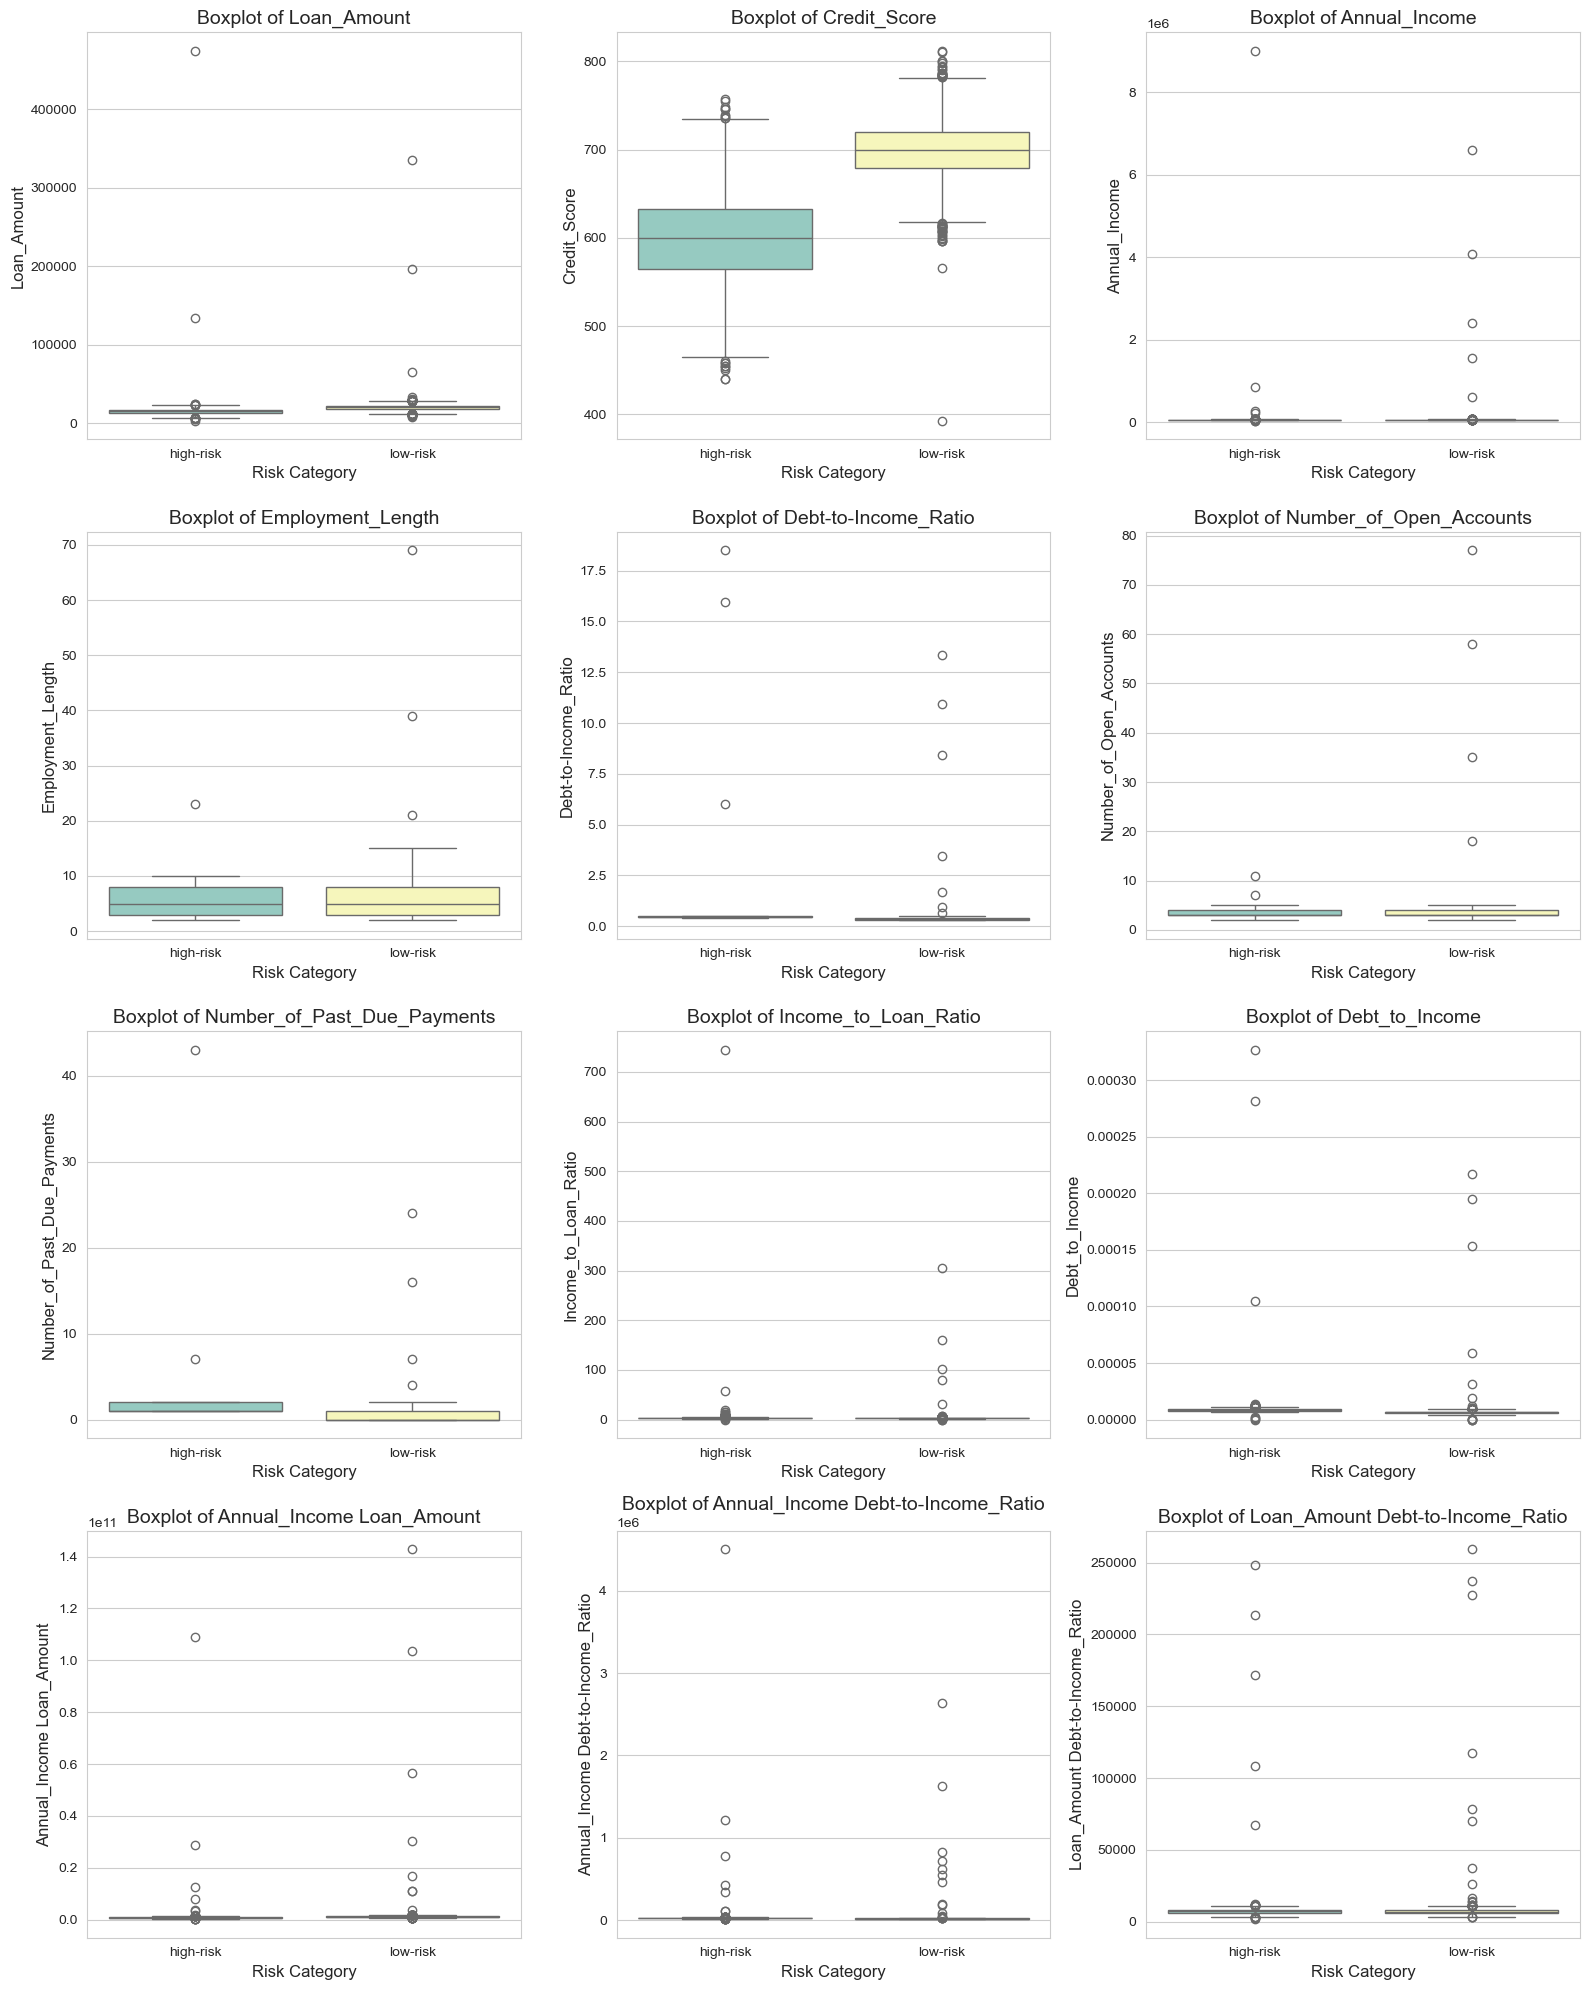

In [20]:
# Function to calculate and display outliers with their ranges
def calculate_outliers(df, columns):
    """
    Calculates outliers in the specified numerical columns using the IQR method.
    
    Parameters:
    df : pandas DataFrame
        The data frame containing the data to analyze.
    columns : list of str
        The list of numerical columns to check for outliers.

    Returns:
    dict : A dictionary with columns as keys and tuples (min_outlier, max_outlier) as values.
    """
    outliers_dict = {}
    
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
            min_outlier = outliers.min() if not outliers.empty else None
            max_outlier = outliers.max() if not outliers.empty else None
            
            outliers_dict[col] = (min_outlier, max_outlier)
    
    return outliers_dict

# Function to plot box plots for numerical columns, highlighting outliers per 'Risk_Category'
def plot_outliers(df, columns):
    """
    Plots box plots to visualize potential outliers in the numerical columns grouped by a categorical feature.

    Parameters:
    df : pandas DataFrame
        The data frame containing the data to plot.
    columns : list of str
        The list of numerical columns for which box plots will be created.

    Returns:
    None : Displays box plots
    """
    
    # Check if 'Risk_Category' exists in the DataFrame
    if 'Risk_Category' not in df.columns:
        raise ValueError("'Risk_Category' column not found in DataFrame")
    
    # Filter columns to only include valid numerical columns in the DataFrame
    columns = [col for col in columns if col in df.columns]
    
    if not columns:
        raise ValueError("No valid columns provided for plotting.")
    
    # Set the figure size based on the number of columns (to avoid overcrowding)
    num_cols = len(columns)  # Number of numerical columns
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows required (3 plots per row)
    
    plt.figure(figsize=(16, 5 * num_rows))  # Dynamically adjust figure size based on the number of rows

    # Loop through each numerical column and create a boxplot
    for i, col in enumerate(columns, 1):
        # Add subplot, 3 columns per row
        plt.subplot(num_rows, 3, i)  
        
        # Create the boxplot, grouped by the 'Risk_Category' column with hue to avoid FutureWarning
        sns.boxplot(data=df, x='Risk_Category', y=col, hue='Risk_Category', palette="Set3", legend=False)
        
        # Add a title for each boxplot
        plt.title(f'Boxplot of {col}', fontsize=14)
        
        # Customize axis labels for better readability
        plt.xlabel('Risk Category', fontsize=12)
        plt.ylabel(f'{col}', fontsize=12)

    # Adjust the layout to ensure the subplots fit within the figure area
    plt.tight_layout()
    
    # Show the resulting box plots
    plt.show()

# Define the list of numerical columns to plot
numerical_columns = ['Loan_Amount', 'Credit_Score', 'Annual_Income', 'Employment_Length', 
                    'Debt-to-Income_Ratio', 'Number_of_Open_Accounts', 'Number_of_Past_Due_Payments', 'Income_to_Loan_Ratio', 'Debt_to_Income',
                    'Annual_Income Loan_Amount', 'Annual_Income Debt-to-Income_Ratio', 'Loan_Amount Debt-to-Income_Ratio']

# Calculate and display outliers
outliers = calculate_outliers(df, numerical_columns)

# Print outliers' ranges for each column
for col, (min_outlier, max_outlier) in outliers.items():
    print(f"Outliers in {col}: Min = {min_outlier}, Max = {max_outlier}")

# Display the outliers in box plots
plot_outliers(df, numerical_columns)


# Outliers Range for All Numeric Columns

- **Loan_Amount**: Min = 3431.0, Max = 474487.0
- **Credit_Score**: Min = 393.0, Max = 536.0
- **Annual_Income**: Min = 36450.05, Max = 9001413.59
- **Employment_Length**: Min = 21.0, Max = 69.0
- **Debt-to-Income_Ratio**: Min = 0.65, Max = 18.5
- **Number_of_Open_Accounts**: Min = 7.0, Max = 77.0
- **Number_of_Past_Due_Payments**: Min = 4.0, Max = 43.0

## Visualize data distributions across all numeric columns

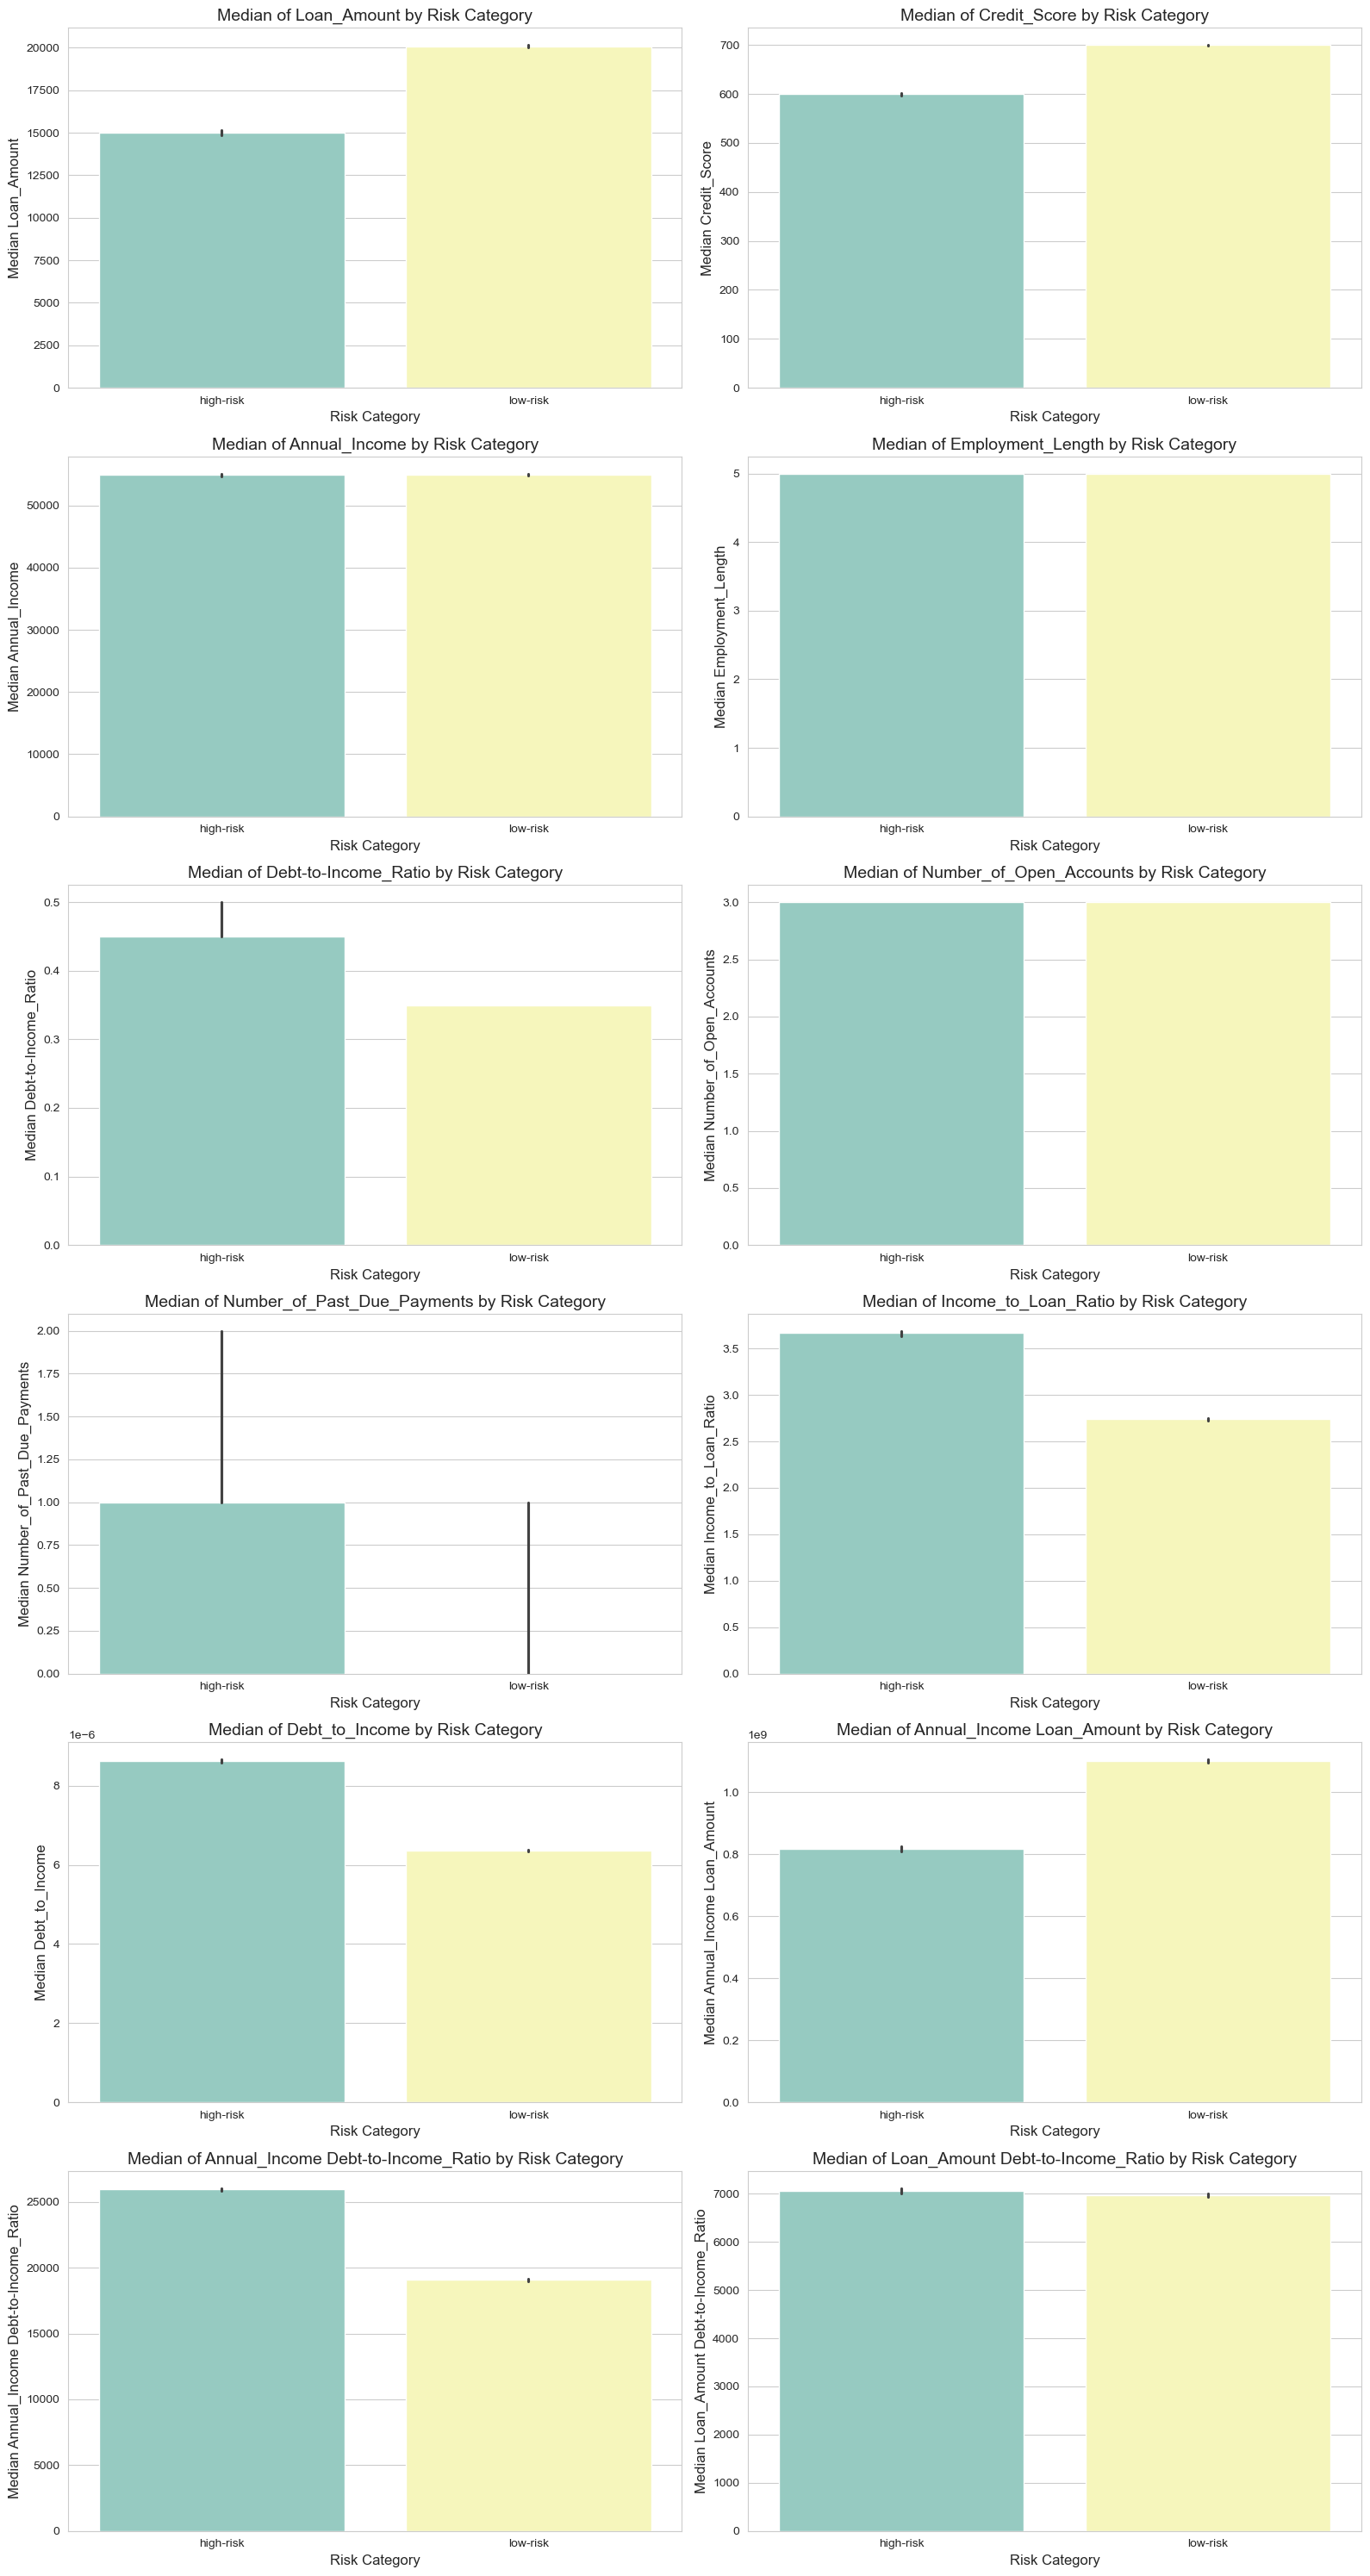

In [21]:
# Function to plot bar plots for numerical columns, showing means (or medians for specific columns) per 'Risk_Category'
def plot_barplots(df, columns):
    """
    Plots bar plots to visualize the mean or median of numerical columns grouped by a categorical feature.

    Parameters:
    df : pandas DataFrame
        The data frame containing the data to plot.
    columns : list of str
        The list of numerical columns for which bar plots will be created.

    Returns:
    None : Displays bar plots
    """
    
    # Check if 'Risk_Category' exists in the DataFrame
    if 'Risk_Category' not in df.columns:
        raise ValueError("'Risk_Category' column not found in DataFrame")
    
    # Filter columns to only include valid numerical columns in the DataFrame
    columns = [col for col in columns if col in df.columns]
    
    if not columns:
        raise ValueError("No valid columns provided for plotting.")
    
    # Set the figure size based on the number of columns
    num_cols = len(columns)  # Number of numerical columns
    num_rows = (num_cols + 1) // 2  # Calculate the number of rows required (2 plots per row)
    
    plt.figure(figsize=(16, 5 * num_rows))  # Dynamically adjust figure size based on the number of rows

    # Columns that should use median instead of mean
    median_cols = ['Loan_Amount', 'Credit_Score', 'Annual_Income', 'Employment_Length', 
                    'Debt-to-Income_Ratio', 'Number_of_Open_Accounts', 'Number_of_Past_Due_Payments', 'Income_to_Loan_Ratio', 'Debt_to_Income',
                    'Annual_Income Loan_Amount', 'Annual_Income Debt-to-Income_Ratio', 'Loan_Amount Debt-to-Income_Ratio']

    # Loop through each numerical column and create a bar plot
    for i, col in enumerate(columns, 1):
        # Add subplot, 2 columns per row
        plt.subplot(num_rows, 2, i)  
        
        # Determine the appropriate estimator: mean (default) or median for specific columns
        estimator = 'median' if col in median_cols else 'mean'
        
        # Create the bar plot, using the appropriate estimator
        sns.barplot(data=df, x='Risk_Category', y=col, hue='Risk_Category', estimator=np.median if estimator == 'median' else np.mean, palette="Set3", 
                   legend=False)
        
        # Add a title for each bar plot
        plt.title(f'{estimator.capitalize()} of {col} by Risk Category', fontsize=14)
        
        # Customize axis labels for better readability
        plt.xlabel('Risk Category', fontsize=12)
        plt.ylabel(f'{estimator.capitalize()} {col}', fontsize=12)

    # Adjust the layout to ensure the subplots fit within the figure area
    plt.tight_layout()
    
    # Show the resulting bar plots
    plt.show()

# Define the list of numerical columns to plot
numerical_columns = ['Loan_Amount', 'Credit_Score', 'Annual_Income', 'Employment_Length', 
                    'Debt-to-Income_Ratio', 'Number_of_Open_Accounts', 'Number_of_Past_Due_Payments', 'Income_to_Loan_Ratio', 'Debt_to_Income',
                    'Annual_Income Loan_Amount', 'Annual_Income Debt-to-Income_Ratio', 'Loan_Amount Debt-to-Income_Ratio']

plot_barplots(df, numerical_columns)

## Observation from the plots

### Median of Loan_Amount by Risk Category:
The median loan amount for **high-risk** borrowers is slightly lower than for **low-risk** borrowers.  
This suggests that higher loan amounts tend to be associated with lower-risk categories.

### Mean of Credit_Score by Risk Category:
The **credit score** is significantly higher for **low-risk** borrowers compared to **high-risk** borrowers.  
This is expected since credit score typically correlates with risk, with higher scores indicating better creditworthiness and lower risk.

### Median of Annual_Income by Risk Category:
The **annual income** median is very similar across both **high-risk** and **low-risk** categories, with a slightly higher value for **low-risk** borrowers.  
Income does not seem to vary much between the two risk categories based on the median, though it could be that the distribution is skewed, leading to a need for the median to be used as the central tendency.

### Median of Employment_Length by Risk Category:
The median **employment length** is the same for both **high-risk** and **low-risk** categories.  
This suggests that employment length might not be a strong factor differentiating risk categories, or the range of employment lengths is narrow for both groups.

### Median of Debt-to-Income Ratio by Risk Category:
The **debt-to-income ratio** is higher for **high-risk** borrowers compared to **low-risk** borrowers.  
A higher debt-to-income ratio typically indicates a higher financial burden, which correlates with higher risk.

### Median of Number_of_Open_Accounts by Risk Category:
The **number of open accounts** is nearly identical between **high-risk** and **low-risk** borrowers.  
This suggests that the number of open accounts alone might not be a strong determinant of risk.

### Median of Number_of_Past_Due_Payments by Risk Category:
The **number of past due payments** is noticeably higher for **high-risk** borrowers, although the difference is not extreme.  
Past due payments are a typical indicator of risk, and this result aligns with expectations that those with more past due payments are considered higher risk.

### General Observations:
- In some cases (like **Loan_Amount**, **Annual_Income**, and **Employment_Length**), the median differences between risk categories are small, suggesting these variables alone might not be strong predictors of risk.
- In contrast, **Credit_Score**, **Debt-to-Income Ratio**, and **Past Due Payments** show more noticeable differences, indicating that these factors are more likely to influence risk assessment.
- Using the **median** for most of these plots highlights the presence of outliers, which is especially useful for columns like **Loan_Amount** and **Debt-to-Income Ratio** where extreme values are likely.


# Reasons to Use Spearman Correlation Matrix to plot heatmap

## 1. Non-parametric Nature
Spearman correlation does not assume a normal distribution of the data. This makes it suitable for datasets where the relationship between variables might not be linear or where the data does not meet the assumptions required for Pearson correlation.

## 2. Ordinal Data
If any of your variables are ordinal (e.g., ranks or ordered categories), Spearman correlation is appropriate as it evaluates the monotonic relationship between the variables without assuming equal intervals.

## 3. Sensitivity to Outliers
Spearman correlation is less affected by outliers compared to Pearson correlation. In your dataset, variables like Loan_Amount and Annual_Income have a wide range, which can skew results when using Pearson correlation.

## 4. Understanding Monotonic Relationships
Spearman correlation measures how well the relationship between two variables can be described by a monotonic function. This is useful when you want to identify whether increases in one variable are associated with increases or decreases in another, regardless of the actual distribution.

## 5. Interpretability
The resulting correlation coefficients from the Spearman matrix can help identify which pairs of variables have strong or weak correlations. This can inform further analysis or modeling decisions.


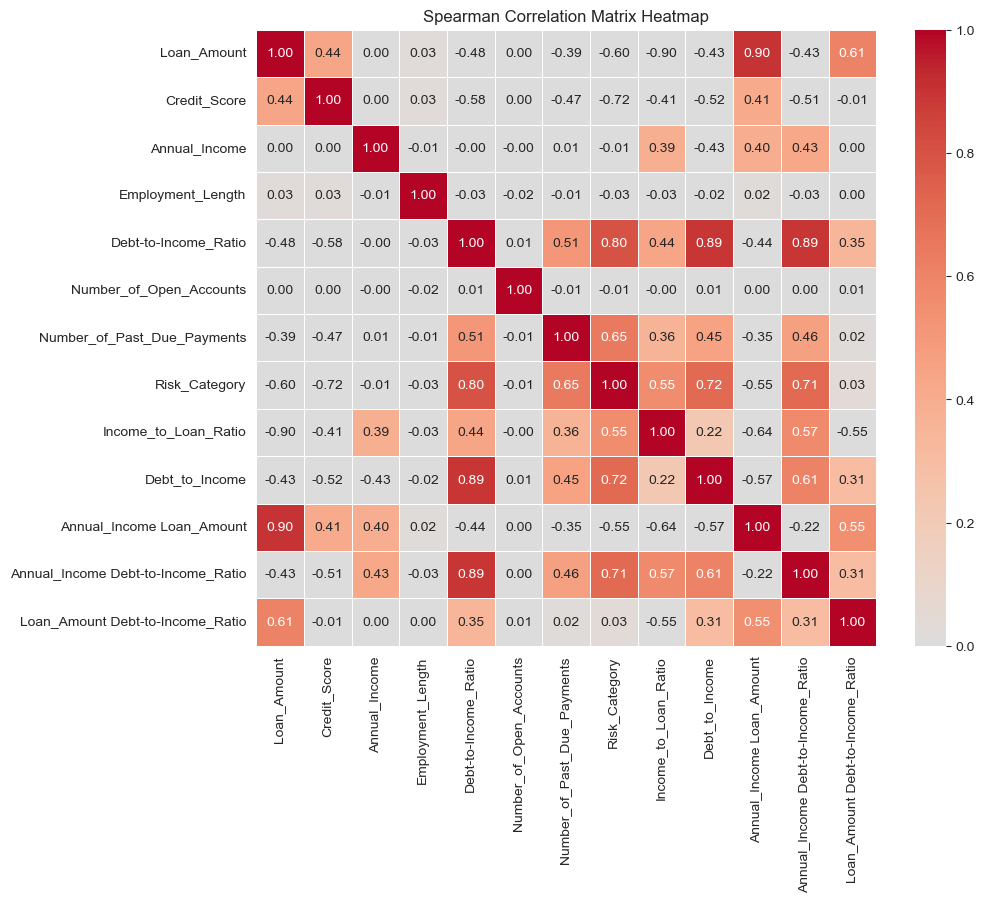

In [22]:
# Create df2 as a copy of df (or modify as needed)
df2 = df.copy()

# Map Risk_Category to numerical values
df2['Risk_Category'] = df['Risk_Category'].map({'low-risk': 0, 'high-risk': 1})

# Select relevant columns for correlation analysis
spearman_vars = df2[['Loan_Amount', 'Credit_Score', 'Annual_Income', 'Employment_Length', 'Debt-to-Income_Ratio', 'Number_of_Open_Accounts',
                    'Number_of_Past_Due_Payments', 'Risk_Category', 'Income_to_Loan_Ratio', 'Debt_to_Income',
                    'Annual_Income Loan_Amount', 'Annual_Income Debt-to-Income_Ratio', 'Loan_Amount Debt-to-Income_Ratio']]

# Compute the Spearman correlation matrix
spearman_corr = spearman_vars.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, vmin=0, vmax=1, linewidths=0.5, fmt=".2f")
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

## Key Observations from heatmap:

### Loan_Amount:
- Positively correlated with **Credit_Score** (0.44).
- Negatively correlated with **Debt-to-Income_Ratio** (-0.48), **Number_of_Past_Due_Payments** (-0.39), and **Risk_Category** (-0.60).  
  This indicates that as the loan amount increases, credit score tends to increase, but debt-to-income ratio, past due payments, and risk category tend to decrease.

### Credit_Score:
- Strong negative correlation with **Risk_Category** (-0.72), suggesting that a higher credit score corresponds to a lower risk category.
- Negative correlation with **Debt-to-Income_Ratio** (-0.58) and **Number_of_Past_Due_Payments** (-0.47), meaning better credit scores are associated with lower debt-to-income ratios and fewer past due payments.

### Annual_Income:
- No significant correlations with any other variables.  
  This suggests that income doesn't play a major role in this dataset's relationships with other features.

### Employment_Length:
- Very weak or no correlations with other features, indicating that length of employment is not strongly associated with the other variables.

### Debt-to-Income_Ratio:
- Positively correlated with **Number_of_Past_Due_Payments** (0.51) and **Risk_Category** (0.80).
- Negatively correlated with **Credit_Score** (-0.58).  
  This suggests that a higher debt-to-income ratio increases the likelihood of higher past due payments and risk category while lowering credit scores.

### Number_of_Open_Accounts:
- Minimal to no correlation with other features, implying that the number of open accounts is largely independent of the other variables.

### Number_of_Past_Due_Payments:
- Positively correlated with **Debt-to-Income_Ratio** (0.51) and **Risk_Category** (0.65), which makes sense as more past due payments likely indicate higher debt and a higher risk category.

### Risk_Category:
- Strong positive correlation with **Debt-to-Income_Ratio** (0.80) and **Number_of_Past_Due_Payments** (0.65).
- Negatively correlated with **Credit_Score** (-0.72) and **Loan_Amount** (-0.60).  
  Higher risk is associated with more past due payments, higher debt-to-income ratios, lower credit scores, and smaller loan amounts.

## Overall Insights:
- **Risk_Category** has the strongest relationships with other features, especially with **Debt-to-Income_Ratio**, **Credit_Score**, and **Number_of_Past_Due_Payments**, which are intuitive given that these factors are key indicators of financial risk.
- **Loan_Amount** is relatively strongly influenced by **Credit_Score** and negatively by **Debt-to-Income_Ratio** and **Risk_Category**.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned Logistic Regression Validation Metrics:
Validation Accuracy: 0.98000
Validation Precision: 0.97318
Validation Recall: 0.95131
Validation F1 Score: 0.96212
Validation ROC AUC: 0.99173
Tuned Logistic Regression Training Metrics:
Training Accuracy: 0.98175
Training Precision: 0.98873
Training Recall: 0.94771
Training F1 Score: 0.96778
Training ROC AUC: 0.99631


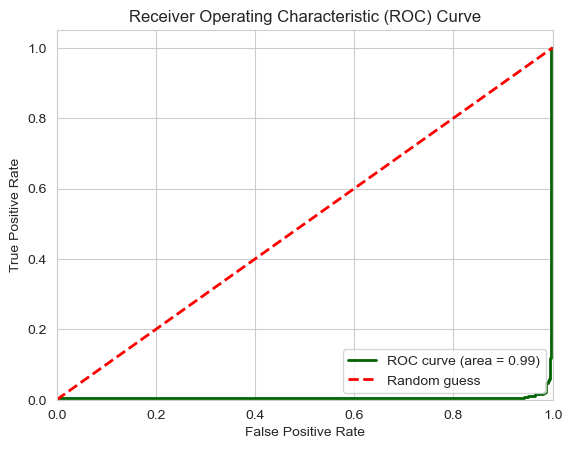

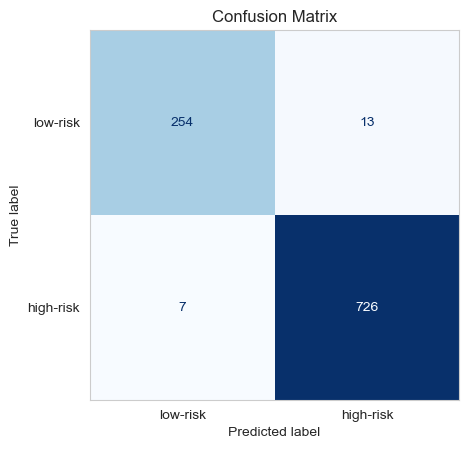

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, confusion_matrix,
                             ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target
X = df.drop('Risk_Category', axis=1)
y = df['Risk_Category']

# Split the data into training (80%) and test-validation (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the test-validation set (20%) into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the categorical and numerical features
nominal_features = ['Loan_Purpose']
numerical_features = ['Loan_Amount', 'Credit_Score', 'Annual_Income', 
                     'Employment_Length', 'Debt-to-Income_Ratio', 
                     'Number_of_Open_Accounts', 'Number_of_Past_Due_Payments', 'Income_to_Loan_Ratio', 'Debt_to_Income',
                    'Annual_Income Loan_Amount', 'Annual_Income Debt-to-Income_Ratio', 'Loan_Amount Debt-to-Income_Ratio']

# Define the transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nom', nominal_transformer, nominal_features),
    ],
    remainder='drop'
)

# Create the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Create a pipeline combining preprocessing and the classifier
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logistic_model)
])

# Define the parameter grid for GridSearchCV
param_grid = [
    {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear'],
        'classifier__penalty': ['l1']
    },
    {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['lbfgs'],
        'classifier__penalty': ['l2']
    }
]

# Set up GridSearchCV
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_val_pred = best_model.predict(X_val)
y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Calculate metrics for the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='binary', pos_label='high-risk')
val_recall = recall_score(y_val, y_val_pred, average='binary', pos_label='high-risk')
val_f1 = f1_score(y_val, y_val_pred, average='binary', pos_label='high-risk')
val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print("Tuned Logistic Regression Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy:.5f}')
print(f'Validation Precision: {val_precision:.5f}')
print(f'Validation Recall: {val_recall:.5f}')
print(f'Validation F1 Score: {val_f1:.5f}')
print(f'Validation ROC AUC: {val_roc_auc:.5f}')

# Calculate metrics for the training set using the best model
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary', pos_label='high-risk')
train_recall = recall_score(y_train, y_train_pred, average='binary', pos_label='high-risk')
train_f1 = f1_score(y_train, y_train_pred, average='binary', pos_label='high-risk')
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

print("Tuned Logistic Regression Training Metrics:")
print(f'Training Accuracy: {train_accuracy:.5f}')
print(f'Training Precision: {train_precision:.5f}')
print(f'Training Recall: {train_recall:.5f}')
print(f'Training F1 Score: {train_f1:.5f}')
print(f'Training ROC AUC: {train_roc_auc:.5f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba, pos_label='high-risk')

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low-risk', 'high-risk'])
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\summe\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [0.99012823 0.99030018 0.99310647 0.9933261  0.99431566 0.99451817
 0.99528731 0.9955029  0.99524796 0.9954476         nan 0.99377206
        nan 0.99625224        nan 0.99731914        nan 0.99797421
        nan 0.99829023]
  warnings.warn(


Tuned KNN Validation Metrics:
Validation Accuracy: 0.98900
Validation Precision: 0.99231
Validation Recall: 0.96629
Validation F1 Score: 0.97913
Validation ROC AUC: 0.99967
Tuned KNN Training Metrics:
Training Accuracy: 1.00000
Training Precision: 1.00000
Training Recall: 1.00000
Training F1 Score: 1.00000
Training ROC AUC: 1.00000


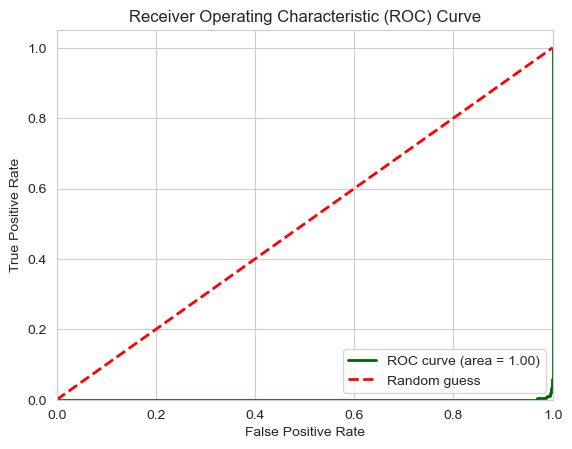

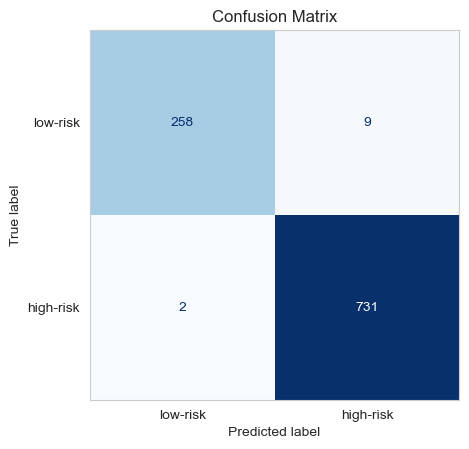

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, confusion_matrix,
                             ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target
X = df.drop('Risk_Category', axis=1)
y = df['Risk_Category']

# Split the data into training (80%) and test-validation (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the test-validation set (20%) into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the categorical and numerical features
nominal_features = ['Loan_Purpose']
numerical_features = ['Loan_Amount', 'Credit_Score', 'Annual_Income', 
                     'Employment_Length', 'Debt-to-Income_Ratio', 
                     'Number_of_Open_Accounts', 'Number_of_Past_Due_Payments', 'Income_to_Loan_Ratio', 'Debt_to_Income',
                    'Annual_Income Loan_Amount', 'Annual_Income Debt-to-Income_Ratio', 'Loan_Amount Debt-to-Income_Ratio']

# Define the transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nom', nominal_transformer, nominal_features),
    ],
    remainder='drop'
)

# Create the KNN model
knn_model = KNeighborsClassifier()

# Create a pipeline combining preprocessing and the classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_model)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'classifier__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'classifier__metric': ['euclidean', 'manhattan']  # Distance metric
}

# Set up GridSearchCV
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_val_pred = best_model.predict(X_val)
y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Calculate metrics for the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='binary', pos_label='high-risk')
val_recall = recall_score(y_val, y_val_pred, average='binary', pos_label='high-risk')
val_f1 = f1_score(y_val, y_val_pred, average='binary', pos_label='high-risk')
val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print("Tuned KNN Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy:.5f}')
print(f'Validation Precision: {val_precision:.5f}')
print(f'Validation Recall: {val_recall:.5f}')
print(f'Validation F1 Score: {val_f1:.5f}')
print(f'Validation ROC AUC: {val_roc_auc:.5f}')

# Calculate metrics for the training set using the best model
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary', pos_label='high-risk')
train_recall = recall_score(y_train, y_train_pred, average='binary', pos_label='high-risk')
train_f1 = f1_score(y_train, y_train_pred, average='binary', pos_label='high-risk')
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

print("Tuned KNN Training Metrics:")
print(f'Training Accuracy: {train_accuracy:.5f}')
print(f'Training Precision: {train_precision:.5f}')
print(f'Training Recall: {train_recall:.5f}')
print(f'Training F1 Score: {train_f1:.5f}')
print(f'Training ROC AUC: {train_roc_auc:.5f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba, pos_label='high-risk')

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low-risk', 'high-risk'])
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Tuned Decision Tree Validation Metrics:
Validation Accuracy: 0.99800
Validation Precision: 0.99625
Validation Recall: 0.99625
Validation F1 Score: 0.99625
Validation ROC AUC: 0.99812
Tuned Decision Tree Training Metrics:
Training Accuracy: 0.99975
Training Precision: 0.99914
Training Recall: 1.00000
Training F1 Score: 0.99957
Training ROC AUC: 1.00000


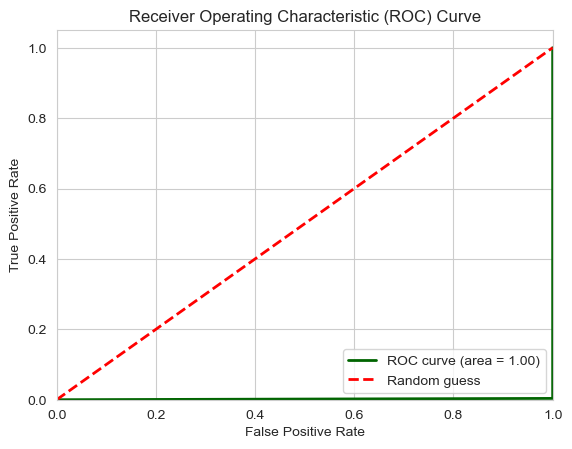

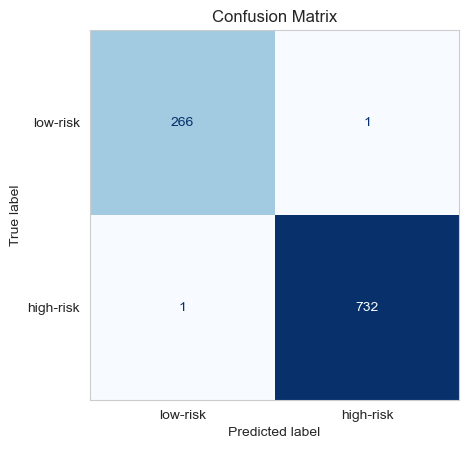

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, confusion_matrix,
                             ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target
X = df.drop('Risk_Category', axis=1)
y = df['Risk_Category']

# Split the data into training (80%) and test-validation (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the test-validation set (20%) into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the categorical and numerical features
nominal_features = ['Loan_Purpose']
numerical_features = ['Loan_Amount', 'Credit_Score', 'Annual_Income', 
                     'Employment_Length', 'Debt-to-Income_Ratio', 
                     'Number_of_Open_Accounts', 'Number_of_Past_Due_Payments', 'Income_to_Loan_Ratio', 'Debt_to_Income',
                    'Annual_Income Loan_Amount', 'Annual_Income Debt-to-Income_Ratio', 'Loan_Amount Debt-to-Income_Ratio']

# Define the transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nom', nominal_transformer, nominal_features),
    ],
    remainder='drop'
)

# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Create a pipeline combining preprocessing and the classifier
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', decision_tree_model)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'classifier__criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Set up GridSearchCV
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_val_pred = best_model.predict(X_val)
y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Calculate metrics for the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='binary', pos_label='high-risk')
val_recall = recall_score(y_val, y_val_pred, average='binary', pos_label='high-risk')
val_f1 = f1_score(y_val, y_val_pred, average='binary', pos_label='high-risk')
val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print("Tuned Decision Tree Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy:.5f}')
print(f'Validation Precision: {val_precision:.5f}')
print(f'Validation Recall: {val_recall:.5f}')
print(f'Validation F1 Score: {val_f1:.5f}')
print(f'Validation ROC AUC: {val_roc_auc:.5f}')

# Calculate metrics for the training set using the best model
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary', pos_label='high-risk')
train_recall = recall_score(y_train, y_train_pred, average='binary', pos_label='high-risk')
train_f1 = f1_score(y_train, y_train_pred, average='binary', pos_label='high-risk')
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

print("Tuned Decision Tree Training Metrics:")
print(f'Training Accuracy: {train_accuracy:.5f}')
print(f'Training Precision: {train_precision:.5f}')
print(f'Training Recall: {train_recall:.5f}')
print(f'Training F1 Score: {train_f1:.5f}')
print(f'Training ROC AUC: {train_roc_auc:.5f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba, pos_label='high-risk')

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low-risk', 'high-risk'])
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Visualising Decision Trees

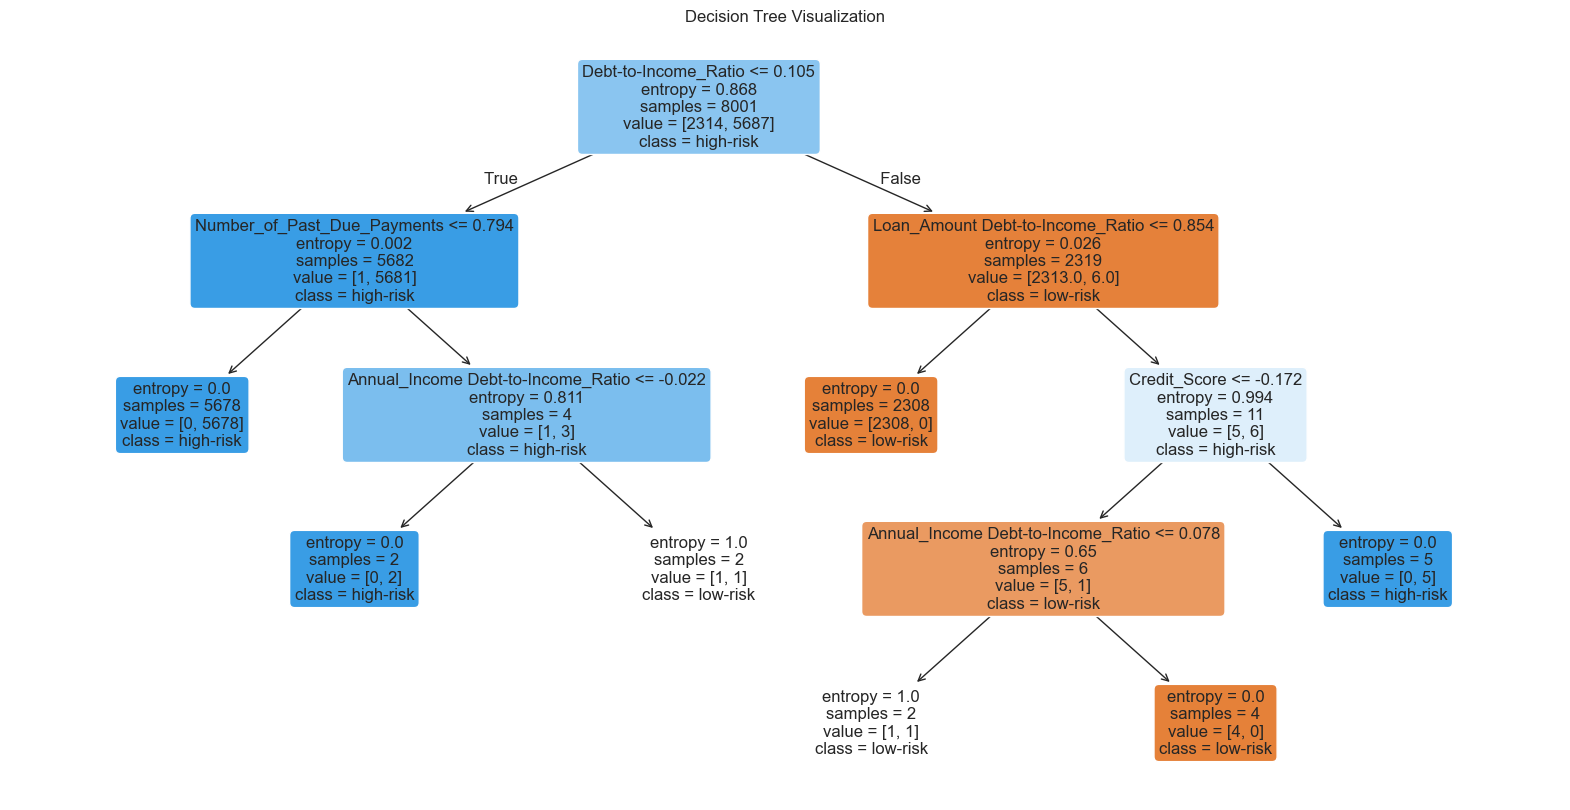

In [27]:
from sklearn.tree import plot_tree

# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model.named_steps['classifier'], 
          feature_names=numerical_features + nominal_features, 
          class_names=['low-risk', 'high-risk'],
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()